```
Milestone 1

Nama  : Delfrin Adiyatma Situmeang 
Batch : HCK
```

**Link dashboard visualisasi data dengan Tableau:
https://public.tableau.com/app/profile/delfrin.adiyatma/viz/Milestone1_17098796027060/Dashboard1?publish=yes**

# Identifikasi Masalah

`Topik dan Latar Belakang Permasalahan`

Sebuah perusahaan film terkenal berencana menggarap sebuah film baru. Film yang akan digarap tersebut diekspektasikan 'Trending' agar perusahaan bisa mendapatkan banyak keuntungan. Oleh karena itu, perusahaan film tersebut merekrut saya sebagai data analyst dan mengharapkan saya dapat memberikan 'insight' berupa karakteristik dan tipe film seperti apa yang bisa meraih popularitas dan keuntungan


`Problem Statement`

Memahami tren industri film, faktor-faktor yang memengaruhi keberhasilan sebuah film, dan karakteristik film yang populer.

`Penjabaran Masalah:`
- Genre film apa yang paling banyak diproduksi?
- Bagaimana pola perilisan film dari Waktu ke Waktu?
- Film dari genre apa yang memiliki rata - rata biaya produksi terendah?
- Genre film apa yang memiliki rata - rata rating tertinggi?
- Berapa potensi minimum dan maksimum biaya produksi film yang berdurasi >100 menit?
- Apakah terdapat perbedaan pendapatan kotor yang signifikan antara film bergenre Action, Romance, dan Thriller?

# Data Loading

Dataset mengandung informasi - informasi seputar film yang tayang di website IMDB. Dataset diambil dari kaggle dengan link https://www.kaggle.com/datasets/adriankiezun/imdb-dataset-2023



Keterangan dari atribut data:
- id - ID film yang digunakan oleh repositori IMDB
- primaryTitle - judul dalam bahasa Inggris
- originalTitle - judul asli dalam bahasa asli
- isAdult - panduan orang tua
- runtimeMinutes - total durasi dalam menit
- genres - genre
- averageRating - rating akhir, berdasarkan semua rating
- numVotes - total jumlah suara (rating)
- budget - total anggaran dalam USD
- gross - total pendapatan kotor di seluruh dunia dalam USD
- release_date - tanggal rilis
- directors - sutradara

In [1]:
#Import pandas sebagai alat untuk mengolah data
import pandas as pd

In [2]:
#Import dan tampilkan data
data = pd.read_csv('imdb_data.csv')
data.head(10)

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner
5,tt0066434,THX 1138,THX 1138,0,86,"Drama,Sci-Fi,Thriller",6.6,53906,777000,2437000.0,"March 11, 1971",George Lucas
6,tt0066921,A Clockwork Orange,A Clockwork Orange,0,136,"Crime,Sci-Fi",8.3,864440,2200000,26960374.0,"December 19, 1971",Stanley Kubrick
7,tt0066995,Diamonds Are Forever,Diamonds Are Forever,0,120,"Action,Adventure,Thriller",6.5,112043,7200000,43829933.0,"December 14, 1971",Guy Hamilton
8,tt0066999,Dirty Harry,Dirty Harry,0,102,"Action,Crime,Thriller",7.7,165277,4000000,35988495.0,"December 21, 1971","Don Siegel, Clint Eastwood"
9,tt0067116,The French Connection,The French Connection,0,104,"Action,Crime,Drama",7.7,131995,1800000,51701871.0,"October 7, 1971",William Friedkin


In [3]:
#Melihat informasi keseluruhan dari data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 314.0+ KB


Data terdiri dari 3348 baris dan 11 kolom yang tipenya sudah benar, kecuali release date yang harus diubah menjadi datetime

In [4]:
#Cek ada atau tidaknya missing value
data.isnull().sum()

id                 0
primaryTitle       0
originalTitle      0
isAdult            0
runtimeMinutes     0
genres             0
averageRating      0
numVotes           0
budget             0
gross             51
release_date       5
directors          0
dtype: int64

Karena terdapat missing value dan jumlahnya hanya sedikit, maka baris yang mengandung missing value akan di drop

In [5]:
#Cek ada atau tidaknya duplikasi
data.duplicated().sum()

0

Tidak terdapat duplikasi

# Data Preparation

In [6]:
#Drop missing value
data = data.dropna()

Karena kolom release_date belum bertipe datetime maka selanjutnya akan diubah. Namun pada dataset ini isi dari kolom release_date tidak konsisten berisi tanggal lengkap sehingga formatnya tidak dapat diubah menjadi datetime. Hal ini dapat diatasi karena semuanya memiliki tahun rilis pada isi kolom release_date sehingga akan dibuat kolom release_year untuk menggantikan kolom release_date

In [7]:
#membuat kolom release_year
data['release_year'] = data['release_date'].str.extract(r'(\d{4})')
data = data.drop(columns = ['release_date'])
data

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,directors,release_year
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,James Mangold,2001
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,Wolfgang Reitherman,1970
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,Brian G. Hutton,1970
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,Robert Altman,1970
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,Franklin J. Schaffner,1970
...,...,...,...,...,...,...,...,...,...,...,...,...
3343,tt9770150,Nomadland,Nomadland,0,107,Drama,7.3,175977,5000000,39458207.0,Chloé Zhao,2020
3344,tt9777666,The Tomorrow War,The Tomorrow War,0,138,"Action,Adventure,Drama",6.6,220617,200000000,14400000.0,Chris McKay,2021
3345,tt9784798,Judas and the Black Messiah,Judas and the Black Messiah,0,126,"Biography,Drama,History",7.4,88568,26000000,7478009.0,Shaka King,2021
3346,tt9844522,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,0,88,"Action,Adventure,Horror",5.7,56955,15000000,65774490.0,Adam Robitel,2021


Akan dilakukan normalisasi untuk kepentingan analisis

In [8]:
#Normalisasi 1NF
data = data.assign(genres=data['genres'].str.split(',')).explode('genres')
data.head(10)

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,directors,release_year
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,Comedy,6.4,87925,48000000,76019048.0,James Mangold,2001
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,Fantasy,6.4,87925,48000000,76019048.0,James Mangold,2001
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,Romance,6.4,87925,48000000,76019048.0,James Mangold,2001
1,tt0065421,The Aristocats,The AristoCats,0,78,Adventure,7.1,111758,4000000,35459543.0,Wolfgang Reitherman,1970
1,tt0065421,The Aristocats,The AristoCats,0,78,Animation,7.1,111758,4000000,35459543.0,Wolfgang Reitherman,1970
1,tt0065421,The Aristocats,The AristoCats,0,78,Comedy,7.1,111758,4000000,35459543.0,Wolfgang Reitherman,1970
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,Adventure,7.6,52628,4000000,5200000.0,Brian G. Hutton,1970
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,Comedy,7.6,52628,4000000,5200000.0,Brian G. Hutton,1970
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,War,7.6,52628,4000000,5200000.0,Brian G. Hutton,1970
3,tt0066026,M*A*S*H,M*A*S*H,0,116,Comedy,7.4,75784,3500000,81600000.0,Robert Altman,1970


In [9]:
#cek nilai yag unique pada kolom isAdult
data['isAdult'].nunique()

1

karena hanya ada 1 nilai unique maka kolom ini dianggap tidak berguna dan akan di drop

In [10]:
#drop kolom isAdult
data = data.drop(columns=['isAdult'])
data.head(10)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,directors,release_year
0,tt0035423,Kate & Leopold,Kate & Leopold,118,Comedy,6.4,87925,48000000,76019048.0,James Mangold,2001
0,tt0035423,Kate & Leopold,Kate & Leopold,118,Fantasy,6.4,87925,48000000,76019048.0,James Mangold,2001
0,tt0035423,Kate & Leopold,Kate & Leopold,118,Romance,6.4,87925,48000000,76019048.0,James Mangold,2001
1,tt0065421,The Aristocats,The AristoCats,78,Adventure,7.1,111758,4000000,35459543.0,Wolfgang Reitherman,1970
1,tt0065421,The Aristocats,The AristoCats,78,Animation,7.1,111758,4000000,35459543.0,Wolfgang Reitherman,1970
1,tt0065421,The Aristocats,The AristoCats,78,Comedy,7.1,111758,4000000,35459543.0,Wolfgang Reitherman,1970
2,tt0065938,Kelly's Heroes,Kelly's Heroes,144,Adventure,7.6,52628,4000000,5200000.0,Brian G. Hutton,1970
2,tt0065938,Kelly's Heroes,Kelly's Heroes,144,Comedy,7.6,52628,4000000,5200000.0,Brian G. Hutton,1970
2,tt0065938,Kelly's Heroes,Kelly's Heroes,144,War,7.6,52628,4000000,5200000.0,Brian G. Hutton,1970
3,tt0066026,M*A*S*H,M*A*S*H,116,Comedy,7.4,75784,3500000,81600000.0,Robert Altman,1970


# Data Visualization

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

**Film dengan genre apa yang paling banyak diproduksi?**

Untuk mengetahui film dengan genre apa yang paling banyak diproduksi, terlebih dahulu film akan di grouping berdasarkan genre lalu akan divisualisasikan dengan barplot

In [12]:
# Menghitung jumlah film untuk setiap genre
genre_counts = data['genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Jumlah Film']
genre_counts

,Genre,Jumlah Film
0,Drama,1522
1,Comedy,1164
2,Action,1144
3,Adventure,881
4,Crime,637
5,Thriller,618
6,Romance,440
7,Horror,393
8,Mystery,370
9,Sci-Fi,370


C:\Users\adiya\AppData\Local\Temp\ipykernel_27824\3354610518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts, x='Genre', y='Jumlah Film', palette='viridis')


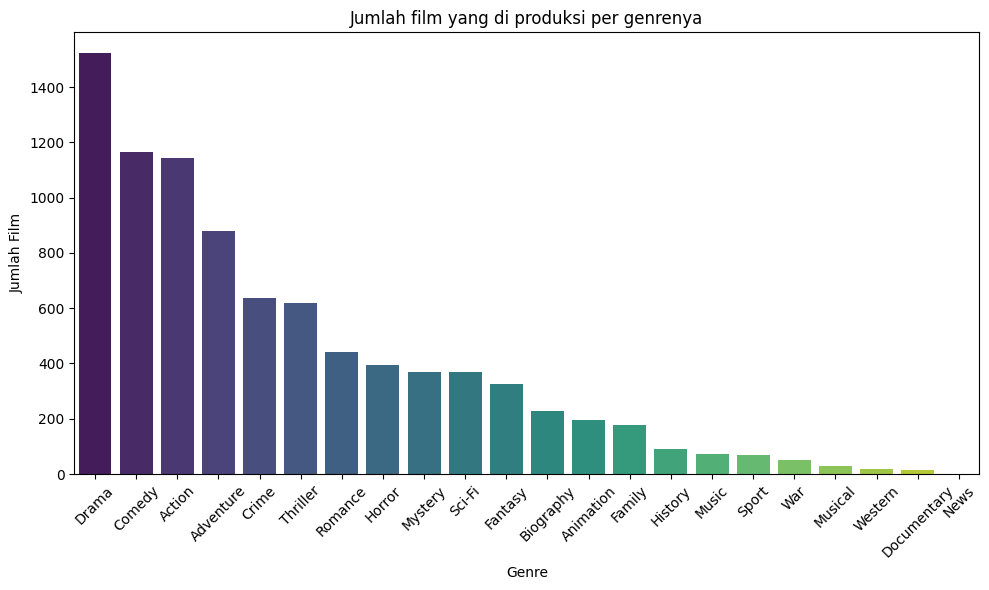

In [13]:
# Membuat barplot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_counts, x='Genre', y='Jumlah Film', palette='viridis')
plt.title('Jumlah film yang di produksi per genrenya')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan plot
plt.show()

`Terlihat pada hasil visualisasi bahwa film yang paling banyak diproduksi adalah film yang bergenre drama lalu diikuti oleh comedy dan action`

**Bagaimana pola perilisan film dari waktu ke waktu?**

Untuk mengetahui pola serta tren apa yang ada pada kuantitas perilisan film dari tahun 1970 sampai 2023, terlebih dahulu film akan di grouping berdasarkan tahun rilis lalu kemudian akan divisualisasikan dengan lineplot

In [14]:
# Membuat DataFrame
df2 = pd.DataFrame(data)

# Menghitung jumlah film yang dirilis setiap tahun
film_counts_per_year = df2['release_year'].value_counts().reset_index()
film_counts_per_year.columns = ['Tahun Rilis', 'Jumlah Film']
film_counts_per_year = film_counts_per_year.sort_values(by='Tahun Rilis', ascending=True)
film_counts_per_year

,Tahun Rilis,Jumlah Film
53,1970,12
48,1971,22
52,1972,13
43,1973,36
51,1974,15
49,1975,18
50,1976,16
47,1977,23
46,1978,23
45,1979,27


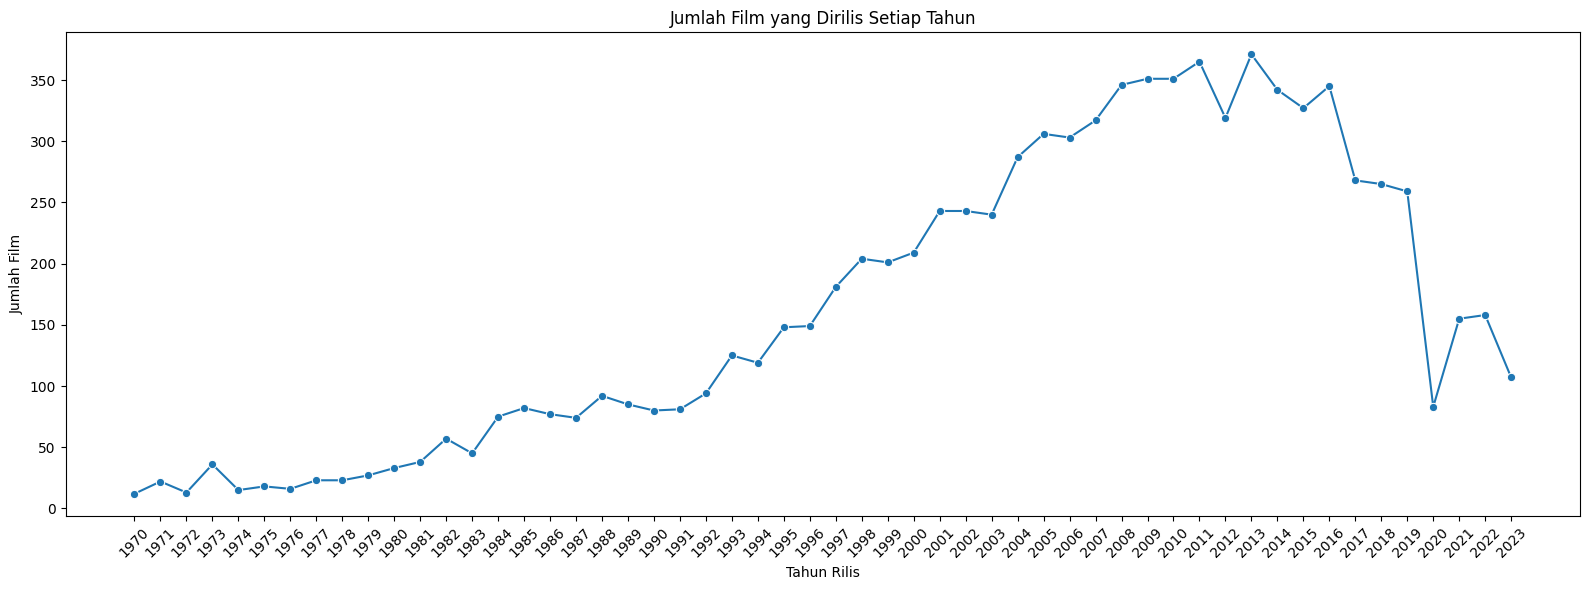

In [15]:
# Membuat line plot menggunakan Seaborn
plt.figure(figsize=(16, 6))
sns.lineplot(data=film_counts_per_year, x='Tahun Rilis', y='Jumlah Film', marker='o')
plt.title('Jumlah Film yang Dirilis Setiap Tahun')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan plot
plt.show()

`Berdasarkan lineplot tersebut kita dapat tahu bahwa jumlah film yang dirilis menunjukkan tren positif (naik) dari tahun 1970 sampai 2013, sebaliknya dari tahun 2013 sampai 2023 tren tersebut berubah menjadi tren negatif (turun)`

**Film dari genre apa yang memakan biaya terendah untuk produksi?**

Untuk mengetahui genre film dengan biaya produksi terendah terlebih dahulu film akan dikelompokkan berdasarkan genre dan akan dihitung rata rata biaya produksinya. Kemudian, akan dilakukan visualisasi dengan barplot.

In [16]:
#Melakukan grouping pada biaya produksi berdasarkan genres
pd.options.display.float_format = '{:,.0f}'.format
genre_budget = data.groupby('genres')['budget'].mean().reset_index(name='Rata-rata Biaya Produksi ($)')
genre_budget = genre_budget.sort_values(by='Rata-rata Biaya Produksi ($)', ascending=True)
genre_budget

,genres,Rata-rata Biaya Produksi ($)
15,News,"1,500,000"
6,Documentary,"6,466,538"
11,Horror,"23,325,532"
12,Music,"24,610,417"
14,Mystery,"31,172,468"
16,Romance,"32,149,540"
20,War,"33,002,041"
3,Biography,"33,476,007"
18,Sport,"34,929,565"
7,Drama,"36,085,346"


C:\Users\adiya\AppData\Local\Temp\ipykernel_27824\1855613979.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_budget, x='Rata-rata Biaya Produksi ($)', y='genres', palette='viridis', orient='horizontal')


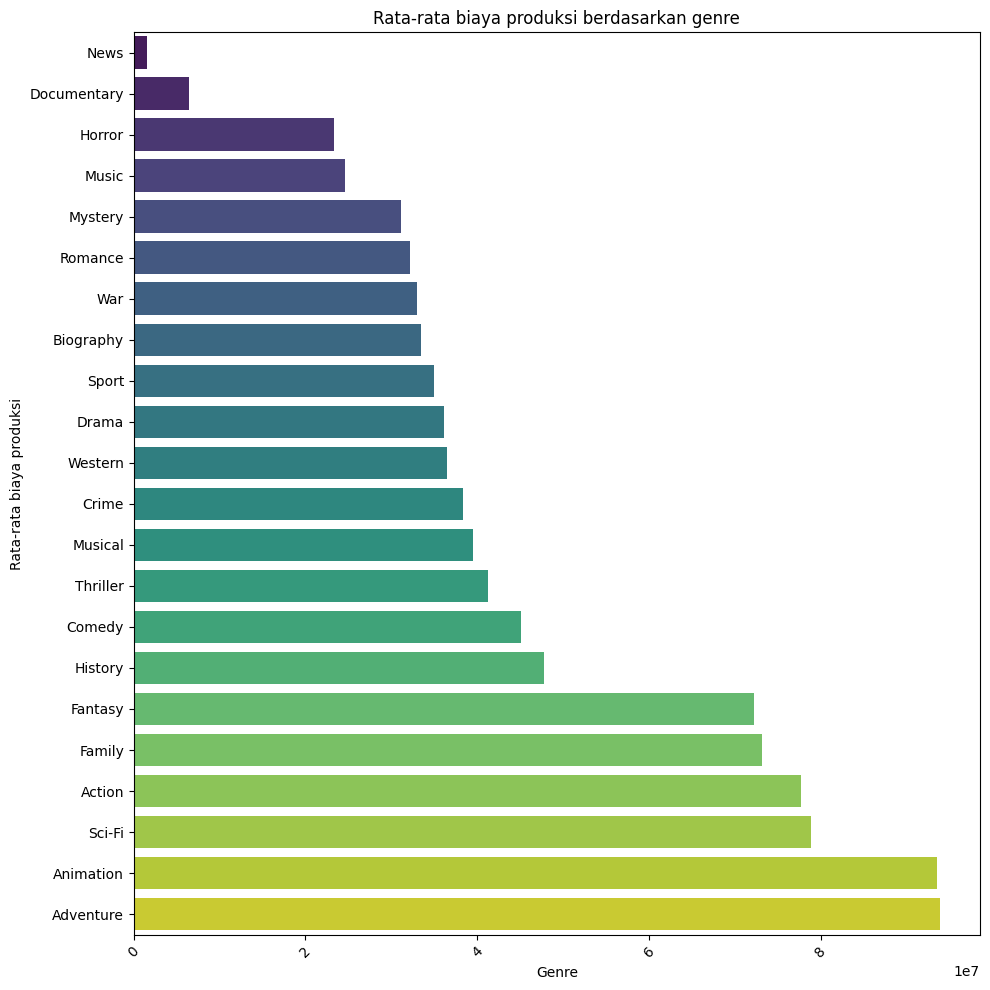

In [17]:
# Membuat horizontal bar plot menggunakan Seaborn
plt.figure(figsize=(10, 10))
sns.barplot(data=genre_budget, x='Rata-rata Biaya Produksi ($)', y='genres', palette='viridis', orient='horizontal')
plt.title('Rata-rata biaya produksi berdasarkan genre')
plt.xlabel('Genre')
plt.ylabel('Rata-rata biaya produksi')
plt.xticks(rotation=45)
plt.tight_layout()

`Berdasarkan barplot horizontal, kita dapat tahu bahwa film dengan genre news merupakan tipe film yang paling sedikit memakan biaya produksi. Terlihat bahwa perbedaan biaya yang ada cukup signifikan dibandingkan dengan film yang memakan biaya produksi tersedikit ke-2 yaitu documentary`

**Genre film apa yang paling disukai oleh penonton?**

Untuk mengetahui genre film apa yang memiliki rata-rata rating tertinggi, terlebih dahulu film akan di grouping berdasarkan genre terhadap rating lalu kemudian di visualisasikan dengan barplot

In [18]:
#Melakukan grouping pada rating berdasarkan genre film
pd.options.display.float_format = None
genre_rating = data.groupby('genres')['averageRating'].mean().reset_index(name='Rata - Rata Rating')
genre_rating

,genres,Rata - Rata Rating
0,Action,6.559878
1,Adventure,6.649830
2,Animation,7.097436
3,Biography,7.304803
4,Comedy,6.581014
5,Crime,6.849765
6,Documentary,7.053846
7,Drama,7.059921
8,Family,6.569663
9,Fantasy,6.489231


C:\Users\adiya\AppData\Local\Temp\ipykernel_27824\1419372983.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_rating, x='genres', y='Rata - Rata Rating', palette='viridis')


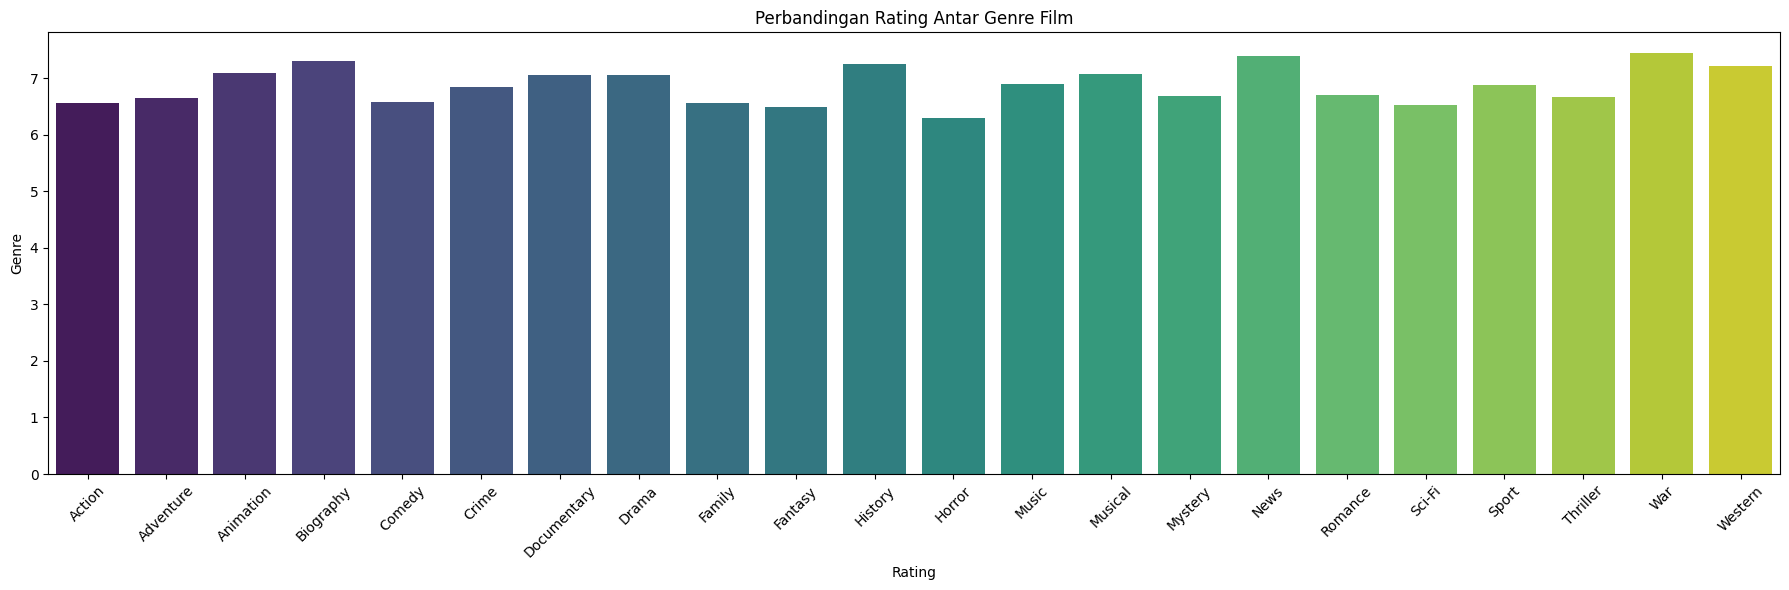

In [19]:
# Membuat bar plot menggunakan Seaborn
plt.figure(figsize=(18, 6))
sns.barplot(data=genre_rating, x='genres', y='Rata - Rata Rating', palette='viridis')
plt.title('Perbandingan Rating Antar Genre Film')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()



`Terlihat bahwa rata-rata rating dari setiap genre tidak terlalu berbeda jauh, rating tertinggi dipegang oleh genre war dengan rata - rata 7.4. Ini menandakan bahwa penonton paling menyukai film dengan genre war dibanding genre yang lain`

# Statistika Deskriptif

**Berapa potensi minimum dan maksimum biaya produksi film yang berdurasi >100 menit?**


Untuk mengetahui potensi minimum dan maksimum biaya produksi film yang berdurasi >100 menit akan dihitung confidence interval (CI) dari kolom budget

In [20]:
# Membuat DataFrame baru berdasarkan runtimeMinutes >100
datar100 = data[data['runtimeMinutes'] > 100]
datar100

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,directors,release_year
0,tt0035423,Kate & Leopold,Kate & Leopold,118,Comedy,6.4,87925,48000000,76019048.0,James Mangold,2001
0,tt0035423,Kate & Leopold,Kate & Leopold,118,Fantasy,6.4,87925,48000000,76019048.0,James Mangold,2001
0,tt0035423,Kate & Leopold,Kate & Leopold,118,Romance,6.4,87925,48000000,76019048.0,James Mangold,2001
2,tt0065938,Kelly's Heroes,Kelly's Heroes,144,Adventure,7.6,52628,4000000,5200000.0,Brian G. Hutton,1970
2,tt0065938,Kelly's Heroes,Kelly's Heroes,144,Comedy,7.6,52628,4000000,5200000.0,Brian G. Hutton,1970
...,...,...,...,...,...,...,...,...,...,...,...
3345,tt9784798,Judas and the Black Messiah,Judas and the Black Messiah,126,Drama,7.4,88568,26000000,7478009.0,Shaka King,2021
3345,tt9784798,Judas and the Black Messiah,Judas and the Black Messiah,126,History,7.4,88568,26000000,7478009.0,Shaka King,2021
3347,tt9893250,I Care a Lot,I Care a Lot,118,Comedy,6.4,141433,14000000,1351662.0,J Blakeson,2020
3347,tt9893250,I Care a Lot,I Care a Lot,118,Crime,6.4,141433,14000000,1351662.0,J Blakeson,2020


In [21]:
# Cek kolom biaya produksi dari dataframe frame film dengan durasi > 100 menit
pd.options.display.float_format = '{:,.0f}'.format
datar100['budget'].describe()

count         6,264
mean     59,141,382
std      56,347,795
min              18
25%      20,000,000
50%      40,000,000
75%      80,000,000
max     356,000,000
Name: budget, dtype: float64

In [22]:
from scipy import stats
import numpy as np

#Menghitung confidence interval dengan tingkat kepercayaan 95%
std = datar100['budget'].std()
N = len(datar100)
low, up = stats.norm.interval(0.95,loc=datar100['budget'].mean(),scale=std/np.sqrt(N))
print('Lower Limit:',low)
print('Upper Limit:',up)

Lower Limit: 57745980.703065336
Upper Limit: 60536783.40357579


`Kita dapat menyimpulkan dengan tingkat kepercayaan 95% bahwa biaya produksi film yang berdurasi lebih dari 100 menit akan berada pada rentang $57745980.703065336 sampai $60536783.40357579.`

# Statisktika Inferensial

**Apakah terdapat perbedaan pendapatan kotor yang signifikan antara film bergenre Action, Romance, dan Thriller?**

Untuk menjawab pertanyaan tersebut akan dilakukan uji Anova, dimana mean dari ketiga group akan diperiksa dan dibandingkan sehingga kita bisa tahu apakah ada perbedaan yang signifikan secara statistik diantara ketiganya

In [23]:
#Extract pendapatan kotor dari ketiga genre tersebut
action = data['gross'][data['genres']=='Action']
romance = data['gross'][data['genres']=='Romance']
thriller = data['gross'][data['genres']=='Thriller']

In [24]:
#Menghitung rata - rata pendapatan kotor dari 3 genre tersebut
print('Rata-rata pendapatan kotor film genre action adalah $', action.mean())
print('Rata-rata pendapatan kotor film genre romance adalah $', romance.mean())
print('Rata-rata pendapatan kotor film genre thriller adalah $', thriller.mean())

Rata-rata pendapatan kotor film genre action adalah $ 236778428.75524476
Rata-rata pendapatan kotor film genre romance adalah $ 117169432.09772727
Rata-rata pendapatan kotor film genre thriller adalah $ 134663272.605178


Hipotesis:

H0 : Tidak ada perbedaan yang signifikan antara biaya produksi dari ketiga kategori film

H1 : Ada perbedaan yang signifikan antara biaya produksi dari ketiga kategori film

In [25]:
res = stats.f_oneway(action, romance, thriller)
print('Statistik Uji:', res.statistic)
print('P-value:', res.pvalue)

Statistik Uji: 56.02504942284118
P-value: 1.854590983322189e-24


` Nilai statistik uji yang tinggi (56.025) dan p-value yang lebih kecil dari nilai kritis (1.854590983322189e-24 < 0,05) menunjukkan bahwa kita dapat menolak hipotesis nol. Oleh karena itu, terdapat bukti yang cukup untuk mendukung hipotesis alternatif bahwa ada perbedaan yang signifikan antara ketiga kategori film dalam hal biaya produksi.`